<a href="https://colab.research.google.com/github/Muhammad-Usama-07/Deep-Learning-in-Practice/blob/master/newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Classifying newswires:(a multiclass classification example)

In [2]:
# Loading the Reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
# checking lenght of train data
len(train_data)

8982

In [5]:
# checking lenght of test data
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
#Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [8]:
train_labels[10]

3

In [0]:
# Encoding the data

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# One hot encoding
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
# Using buildin way of keras
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
# Building Model
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
# Compling Model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
# Setting a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
# training model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 2.7076 - accuracy: 0.4585 - val_loss: 1.7978 - val_accuracy: 0.6220
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4239 - accuracy: 0.7122 - val_loss: 1.2879 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0280 - accuracy: 0.7863 - val_loss: 1.1231 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8001 - accuracy: 0.8319 - val_loss: 1.0589 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6454 - accuracy: 0.8653 - val_loss: 0.9515 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5197 - accuracy: 0.8925 - val_loss: 0.8889 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4181 - accuracy: 0.9139 - val_loss: 0.8815 - val_accuracy: 0.8060
Epoch 8/20
16

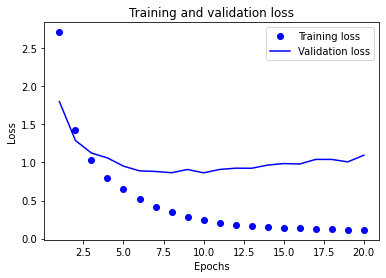

In [19]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()